# Introduction to Statistics

## 1. What is Statistics?
- **Definition**: The practice and study of collecting and analyzing data.
- **Summary Statistic**: A fact about or summary of data, such as an **average** or a **count**.

## 2. What Can Statistics Do?
Statistics helps answer important questions, such as:
- How likely is someone to purchase a product?
- Does a different payment system influence purchasing behavior?
- How can a hotel optimize occupancy?
- How many sizes of jeans should be manufactured to fit **95%** of the population?
- Which advertisement is more effective? (**A/B testing** can help answer this.)

## 3. What Can't Statistics Do?
- **Statistics cannot always explain *why* something happens.**
- **Example**: Why is *Game of Thrones* so popular?
  - We can analyze viewer data but cannot determine the exact reason for its popularity.

## 4. Types of Statistics
### Two Main Branches:
1. **Descriptive Statistics** – Summarizes and describes data.
   - **Example**: Among four friends, **50% drive** to work, **25% take the bus**, and **25% bike**.
2. **Inferential Statistics** – Makes predictions about a larger population using sample data.
   - **Example**: Estimating the percentage of people who drive to work based on a small sample.

## 5. Types of Data
### Two Main Types:
1. **Numeric (Quantitative) Data** – Made up of numbers.
   - **Continuous Data**: Measured values (e.g., speed, time).
   - **Discrete Data**: Counted values (e.g., number of pets, packages shipped).
2. **Categorical (Qualitative) Data** – Belong to distinct groups.
   - **Nominal Data**: No inherent order (e.g., marital status, country of residence).
   - **Ordinal Data**: Has an order (e.g., survey ratings from **1 to 5**).

## 6. Categorical Data Can Be Represented as Numbers
- **Example**: Marital status (Married = 1, Unmarried = 0).
- **Note**: Using numbers doesn’t make categorical variables numeric.

## 7. Why Does Data Type Matter?
- **Identifying data types helps determine appropriate summary statistics and visualizations.**
  - **Numerical Data**: Use **mean**, **scatter plots**, etc.
  - **Categorical Data**: Use **counts**, **bar plots**, etc.


# Measures of Center

## 1. Mean (Average)
- **Definition**: The sum of all values divided by the number of data points.
- **Formula**: \( \text{Mean} = \frac{\sum X}{n} \)

## 2. Median
- **Definition**: The middle value when data is sorted.
- **Steps to Find Median**:
  1. Arrange the data in ascending order.
  2. If **n** is odd, the median is the middle value.
  3. If **n** is even, the median is the average of the two middle values.

## 3. Mode
- **Definition**: The most frequently occurring value in the dataset.
- **Usage**: Often used for **categorical data**.

## 4. Impact of Outliers
- **Outliers** can significantly affect the mean, making it less reliable for skewed data.
- **Example**: If one person in a group has an extremely high salary, the mean salary increases significantly, but the median remains stable.

## 5. Which Measure to Use?
- **Symmetrical Data**: The **mean** is a good choice.
- **Skewed Data**: The **median** is better as it is less affected by extreme values.
- **Categorical Data**: Use the **mode**.

## 6. Conclusion
- When data is skewed, the **mean** is pulled in the direction of the skew.
- The **median** is more robust against extreme values and is preferred when data contains outliers.
- **Final Recommendation**: In most cases, the **median** is the best measure of center when dealing with real-world data.


In [22]:
import pandas as pd

#Import data 
food_consumption = pd.read_csv(r"C:\Users\Nikhil Patil\Downloads\food_consumption.csv")

In [25]:
#Initial Check 
food_consumption.head(2)

,Unnamed: 0,country,food_category,consumption,co2_emission
0,1,Argentina,pork,10.51,37.20
1,2,Argentina,poultry,38.66,41.53


In [27]:
#Check data shape
food_consumption.shape


(1430, 5)

In [29]:
# Import numpy with alias np
import numpy as np 

# Subset country for USA: usa_consumption
usa_consumption = food_consumption[food_consumption['country'] == 'USA']

# Calculate mean consumption in USA
print(np.mean(usa_consumption['consumption']))

# Calculate median consumption in USA
print(np.median(usa_consumption['consumption']))

44.650000000000006
14.58


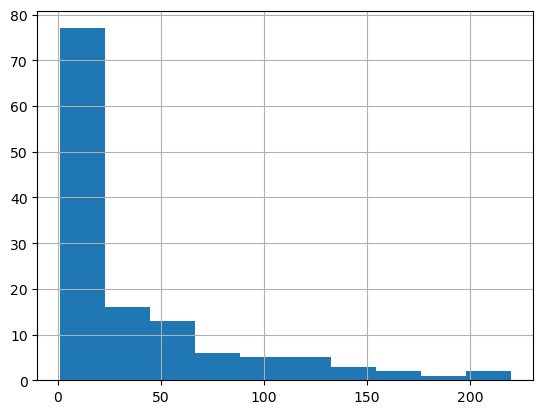

In [8]:
#Mean vs. median

# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt

# Subset for food_category equals rice
rice_consumption = food_consumption[food_consumption['food_category']=='rice']


# Histogram of co2_emission for rice and show plot
rice_consumption['co2_emission'].hist()
plt.show()


In [9]:
# Subset for food_category equals rice
rice_consumption = food_consumption[food_consumption['food_category'] == 'rice']

# Calculate mean and median of co2_emission with .agg()
print(rice_consumption['co2_emission'].agg([np.mean, np.median]))

mean      37.591615
median    15.200000
Name: co2_emission, dtype: float64


# Measures of Spread

## 1. What is Spread?
- Spread describes how **close together** or **far apart** data points are.
- Similar to measures of center, there are different ways to measure spread.

## 2. Variance
- Measures the **average squared** distance from the mean.
- Higher variance = More spread-out data.
- **Formula:**
  \[ \sigma^2 = \frac{\sum (x_i - \bar{x})^2}{n-1} \]
- In Python:
  ```python
  import numpy as np
  variance = np.var(data, ddof=1)
  ```

## 3. Standard Deviation (SD)
- **Square root** of variance, making it more interpretable.
- **Formula:**
  \[ \sigma = \sqrt{\sigma^2} \]
- In Python:
  ```python
  std_dev = np.std(data, ddof=1)
  ```

## 4. Mean Absolute Deviation (MAD)
- **Absolute value** of distances to the mean.
- Unlike SD, **all distances are treated equally** (no squaring).
- In Python:
  ```python
  mad = np.mean(np.abs(data - np.mean(data)))
  ```

## 5. Quantiles and Quartiles
- **Quantiles** split data into equal parts (e.g., percentiles).
- **Quartiles** divide data into 4 equal parts.
- In Python:
  ```python
  q1, q2, q3 = np.quantile(data, [0.25, 0.5, 0.75])
  ```

## 6. Boxplots
- Boxplots **visualize quartiles**.
- **Q1 (25%)** → Bottom of the box
- **Q2 (50%)** → Median (middle line)
- **Q3 (75%)** → Top of the box

## 7. Interquartile Range (IQR)
- Measures spread between **Q1 and Q3**.
- **Formula:**
  \[ IQR = Q3 - Q1 \]
- In Python:
  ```python
  from scipy.stats import iqr
  iqr_value = iqr(data)
  ```

## 8. Outliers
- **Definition:** Points that are **far from the rest** of the data.
- **Outlier rule:**
  - **Below**: \( Q1 - 1.5 \times IQR \)
  - **Above**: \( Q3 + 1.5 \times IQR \)
- In Python:
  ```python
  lower_bound = q1 - 1.5 * iqr_value
  upper_bound = q3 + 1.5 * iqr_value
  outliers = data[(data < lower_bound) | (data > upper_bound)]
  ```

## 9. Quick Summary Statistics
- Get all key stats in one line using Pandas:
  ```python
  df.describe()
  ```



                        var         std
food_category                          
beef           88748.408132  297.906710
dairy          17671.891985  132.935669
eggs              21.371819    4.622966
fish             921.637349   30.358481
lamb_goat      16475.518363  128.356996
nuts              35.639652    5.969895
pork            3094.963537   55.632396
poultry          245.026801   15.653332
rice            2281.376243   47.763754
soybeans           0.879882    0.938020
wheat             71.023937    8.427570


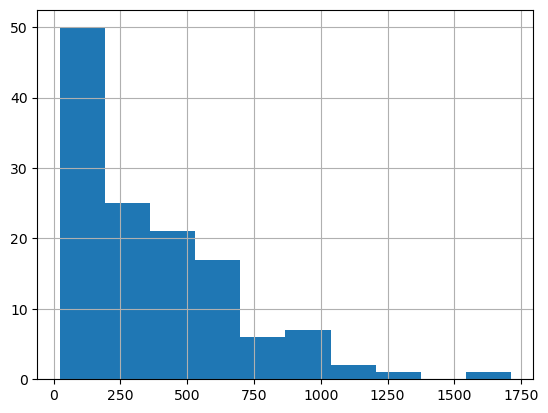

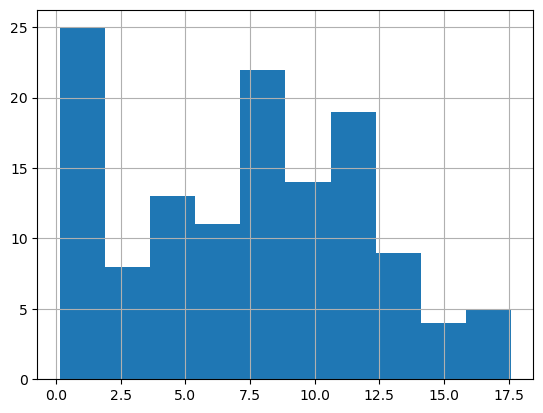

In [10]:
# Print variance and sd of co2_emission for each food_category
print(food_consumption.groupby('food_category')['co2_emission'].agg([np.var, np.std]))

# Create histogram of co2_emission for food_category 'beef'
food_consumption[food_consumption['food_category']== 'beef']['co2_emission'].hist()
plt.show()

# Create histogram of co2_emission for food_category 'eggs'
food_consumption[food_consumption['food_category']== 'eggs']['co2_emission'].hist()
plt.show()

In [11]:
#Quartiles, quantiles, and quintiles

In [12]:
# Calculate the quartiles of co2_emission
print(np.quantile(food_consumption['co2_emission'], [0, 0.25, 0.5, 0.75, 1]))

[   0.        5.21     16.53     62.5975 1712.    ]


In [14]:
# Calculate the six quantiles that split up the data into 5 pieces
print(np.quantile(food_consumption['co2_emission'], [0, 0.2, 0.4, 0.6, 0.8, 1]))

[   0.       3.54    11.026   25.59    99.978 1712.   ]


In [16]:
#Quantiles using np.linspace()

#np.linspace(start, stop, num)

print(np.quantile(food_consumption['co2_emission'], np.linspace(0, 1, 11)))

[0.00000e+00 6.68000e-01 3.54000e+00 7.04000e+00 1.10260e+01 1.65300e+01
 2.55900e+01 4.42710e+01 9.99780e+01 2.03629e+02 1.71200e+03]


##Finding Outliers Using IQR

Outliers can have significant effects on statistics like the **mean**, as well as on statistics that rely on the mean, such as **variance** and **standard deviation**. The **interquartile range (IQR)** is a measure of spread that is **less influenced by outliers**. 

IQR is often used to **identify outliers**. A value is considered an outlier if it falls outside the range:

\[ Q1 - 1.5 \times IQR \] 
\[ Q3 + 1.5 \times IQR \]

This is also the method used to determine the whisker lengths in a **matplotlib** box plot.

##Box Plot Representation:
![Box Plot - Median, Quartiles, and Outliers](https://assets.datacamp.com/production/repositories/5758/datasets/ca7e6e1832be7ec1842f62891815a9b0488efa83/Screen%20Shot%202020-04-28%20at%2010.04.54%20AM.png)



In [18]:
# Calculate total co2_emission per country: emissions_by_country
emissions_by_country = food_consumption.groupby('country')['co2_emission'].sum()

print(emissions_by_country)

country
Albania      1777.85
Algeria       707.88
Angola        412.99
Argentina    2172.40
Armenia      1109.93
              ...   
Uruguay      1634.91
Venezuela    1104.10
Vietnam       641.51
Zambia        225.30
Zimbabwe      350.33
Name: co2_emission, Length: 130, dtype: float64


In [19]:
# Calculate total co2_emission per country: emissions_by_country
emissions_by_country = food_consumption.groupby('country')['co2_emission'].sum()

# Compute the first and third quartiles and IQR of emissions_by_country
q1 = np.quantile(emissions_by_country, 0.25)
q3 = np.quantile(emissions_by_country, 0.75)
iqr = q3 - q1

In [20]:
# Calculate the lower and upper cutoffs for outliers
lower = q1 - 1.5*iqr
upper = q3 + 1.5*iqr

In [21]:
# Subset emissions_by_country to find outliers
outliers = emissions_by_country[(emissions_by_country < lower) | (emissions_by_country > upper)]
print(outliers)

country
Argentina    2172.4
Name: co2_emission, dtype: float64


# Probability Basics

## 1. What are the Chances?
- People frequently talk about chance, such as:
  - What are the chances of closing a sale?
  - What is the probability of rain tomorrow?
  - What are the odds of winning a game?
- But how do we measure chance mathematically?

## 2. Measuring Chance
- **Probability** measures the likelihood of an event occurring.
- Formula: 
  ```python
  Probability = (Number of favorable outcomes) / (Total possible outcomes)
  ```
- Example: Coin Flip
  - Two possible outcomes: **Heads** or **Tails**
  - Probability of heads = `1 / 2 = 0.5` (50%)
- Probability is always between **0% (impossible)** and **100% (certain)**.

## 3. Assigning Salespeople
- Suppose we randomly select a salesperson for a client meeting.
- Each person's name is placed on a ticket in a box.
- A name is pulled at random to decide who attends the meeting.
- Example: Brian's name gets pulled out.
  - Probability of selecting Brian: `1/4 = 25%`

## 4. Sampling from a DataFrame
- We can simulate this scenario in Python using Pandas:
  ```python
  import pandas as pd
  df.sample(n=1)  # Randomly selects one row
  ```
- Running this multiple times may yield different results.

## 5. Setting a Random Seed
- To ensure **consistent results**, we use a random seed:
  ```python
  import numpy as np
  np.random.seed(42)  # Setting a seed for reproducibility
  ```
- The actual seed number doesn’t matter, as long as we use the **same seed** each time.

## 6. Sampling Without Replacement
- If another client meeting is scheduled at the same time, we need a **new** salesperson.
- Since Brian is already selected, we pick from the remaining three.
- This is called **sampling without replacement**.
- Example: Claire gets picked.
  - Probability: `1/3 ≈ 33%`
- In Python:
  ```python
  df.sample(n=2, replace=False)  # Selects two different people
  ```

## 7. Sampling With Replacement
- If meetings happen on **different** days, we can select the same person again.
- This is called **sampling with replacement**.
- Example: Claire gets picked again, but now:
  - Probability = `1/4 = 25%`
- In Python:
  ```python
  df.sample(n=2, replace=True)  # Same person can appear multiple times
  ```

## 8. Independent vs. Dependent Events
- **Independent Events**:
  - The probability of the second event **is not affected** by the first.
  - Example: Sampling **with** replacement.
  - Probability of Claire being picked second remains `25%`, no matter who was picked first.
- **Dependent Events**:
  - The probability of the second event **changes** based on the first.
  - Example: Sampling **without** replacement.
  - If Claire is picked first, the probability of picking her second is `0%`.
  - If someone else is picked first, Claire’s probability of being picked second is `33%`.

## 9. Summary
- **Sampling with replacement** = Independent events.
- **Sampling without replacement** = Dependent events.
- Setting a **random seed** ensures reproducibility in Python.
- **Probability calculations** help us understand and predict outcomes.



In [2]:
#import data
import pandas as pd
amir_deals = pd.read_csv(r"C:\Users\Nikhil Patil\Downloads\amir_deals.csv")

In [3]:
amir_deals.head(2)

,Unnamed: 0,product,client,status,amount,num_users
0,1,Product F,Current,Won,7389.52,19
1,2,Product C,New,Won,4493.01,43


In [4]:
# Count the deals for each product
counts = amir_deals['product'].value_counts()
print(counts)

Product B    62
Product D    40
Product A    23
Product C    15
Product F    11
Product H     8
Product I     7
Product E     5
Product N     3
Product G     2
Product J     2
Name: product, dtype: int64


In [5]:
# Calculate probability of picking a deal with each product
probs = counts / amir_deals.shape[0]
print(probs)

Product B    0.348315
Product D    0.224719
Product A    0.129213
Product C    0.084270
Product F    0.061798
Product H    0.044944
Product I    0.039326
Product E    0.028090
Product N    0.016854
Product G    0.011236
Product J    0.011236
Name: product, dtype: float64


In [8]:
#necessary package 
import pandas as pd
import numpy as np

In [9]:
# Set random seed
np.random.seed(24)

# Sample 5 deals without replacement
sample_without_replacement = amir_deals.sample(5)
print(sample_without_replacement)

     Unnamed: 0    product   client status   amount  num_users
127         128  Product B  Current    Won  2070.25          7
148         149  Product D  Current    Won  3485.48         52
77           78  Product B  Current    Won  6252.30         27
104         105  Product D  Current    Won  4110.98         39
166         167  Product C      New   Lost  3779.86         11


In [10]:
# Sample 5 deals with replacement
sample_with_replacement = amir_deals.sample(5, replace=True)
print(sample_with_replacement)

     Unnamed: 0    product   client status   amount  num_users
133         134  Product D  Current    Won  5992.86         98
101         102  Product H  Current    Won  5116.34         63
110         111  Product B  Current    Won   696.88         44
49           50  Product B  Current    Won  3488.36         79
56           57  Product D  Current    Won  6820.84         42


# Discrete Distributions


In [12]:
# 1. Rolling the Dice
# A fair six-sided die has six possible outcomes, each with equal probability.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
outcomes = [1, 2, 3, 4, 5, 6]
probabilities = [1/6] * 6  # Uniform probability distribution

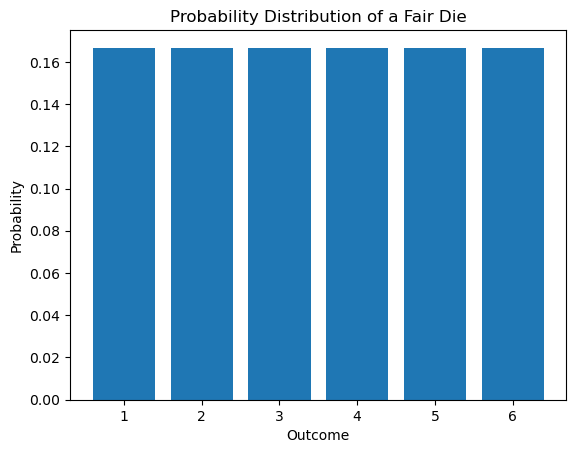

In [15]:
# Visualizing probability distribution
plt.bar(outcomes, probabilities)
plt.xlabel("Outcome")
plt.ylabel("Probability")
plt.title("Probability Distribution of a Fair Die")
plt.show()

In [16]:
# 2. Expected Value Calculation
expected_value = sum(outcome * prob for outcome, prob in zip(outcomes, probabilities))
print(f"Expected Value of Rolling a Fair Die: {expected_value}")

Expected Value of Rolling a Fair Die: 3.5


In [17]:
# 3. Uneven Die Scenario
# Assume the '2' face is turned into another '3', changing the probability distribution.
outcomes_modified = [1, 2, 3, 4, 5, 6]
probabilities_modified = [1/6, 0, 1/3, 1/6, 1/6, 1/6]  # Adjusted probabilities

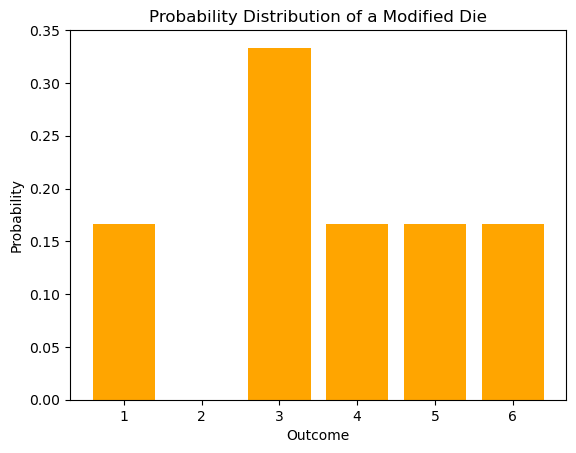

In [18]:
# Visualizing new probability distribution
plt.bar(outcomes_modified, probabilities_modified, color='orange')
plt.xlabel("Outcome")
plt.ylabel("Probability")
plt.title("Probability Distribution of a Modified Die")
plt.show()

In [19]:
# 4. Sampling from a Discrete Distribution
die_df = pd.DataFrame({"Outcome": outcomes, "Probability": probabilities})
np.random.seed(42)  # Ensuring reproducibility
sample_10 = np.random.choice(die_df["Outcome"], size=10, replace=True, p=die_df["Probability"])
print(f"10 Rolls Sampled from a Fair Die: {sample_10}")

10 Rolls Sampled from a Fair Die: [3 6 5 4 1 1 1 6 4 5]


In [20]:
# 5. Law of Large Numbers
sample_sizes = [10, 100, 1000]
means = []


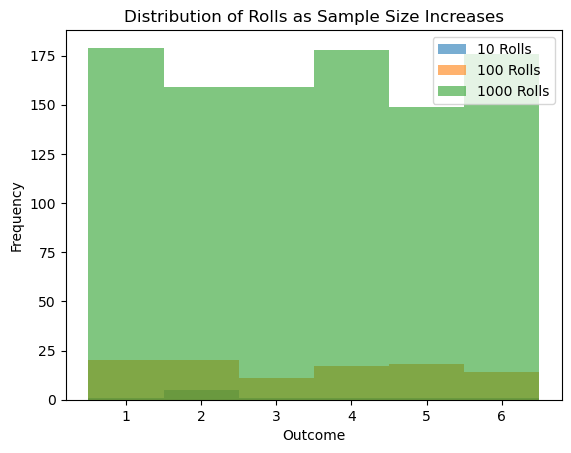

In [21]:
for size in sample_sizes:
    sample = np.random.choice(die_df["Outcome"], size=size, replace=True, p=die_df["Probability"])
    means.append(np.mean(sample))
    plt.hist(sample, bins=np.linspace(0.5, 6.5, 7), alpha=0.6, label=f"{size} Rolls")

plt.xlabel("Outcome")
plt.ylabel("Frequency")
plt.title("Distribution of Rolls as Sample Size Increases")
plt.legend()
plt.show()

In [22]:
# 6. Observing Convergence to Expected Value
for size, mean in zip(sample_sizes, means):
    print(f"Mean of {size} Rolls: {mean:.2f}")

print("As sample size increases, the sample mean approaches the expected mean (Law of Large Numbers).")


Mean of 10 Rolls: 2.90
Mean of 100 Rolls: 3.35
Mean of 1000 Rolls: 3.49
As sample size increases, the sample mean approaches the expected mean (Law of Large Numbers).


In [26]:
#Continuous distributions

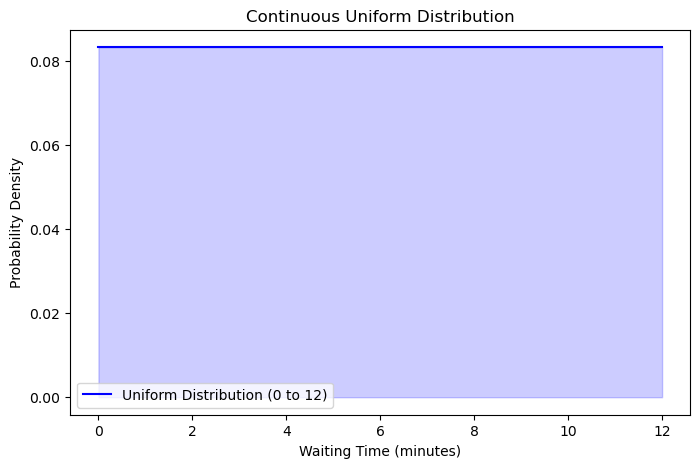

Probability of waiting between 4 and 7 minutes: 25.00%
Probability of waiting less than 7 minutes: 58.33%
Probability of waiting more than 7 minutes: 41.67%
Probability of waiting between 4 and 7 minutes using scipy: 25.00%
Random samples from uniform distribution: [ 9.89617159  4.17371049  8.13619383  6.78878357  3.20433924 10.54355984
  9.56911226  7.90142202 10.20698075 10.40753041]


In [27]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Define the range for the uniform distribution
lower, upper = 0, 12

# Generate x values for plotting
x = np.linspace(lower, upper, 1000)
y = np.full_like(x, 1/(upper - lower))  # Uniform PDF is constant

# Plot the uniform distribution
plt.figure(figsize=(8, 5))
plt.plot(x, y, label='Uniform Distribution (0 to 12)', color='blue')
plt.fill_between(x, y, alpha=0.2, color='blue')
plt.xlabel('Waiting Time (minutes)')
plt.ylabel('Probability Density')
plt.title('Continuous Uniform Distribution')
plt.legend()
plt.show()

# Probability of waiting between 4 and 7 minutes
p_4_to_7 = (7 - 4) / (upper - lower)
print(f'Probability of waiting between 4 and 7 minutes: {p_4_to_7:.2%}')

# Using scipy to calculate probabilities
p_less_than_7 = stats.uniform.cdf(7, lower, upper - lower)
print(f'Probability of waiting less than 7 minutes: {p_less_than_7:.2%}')

p_more_than_7 = 1 - p_less_than_7
print(f'Probability of waiting more than 7 minutes: {p_more_than_7:.2%}')

p_4_to_7_scipy = stats.uniform.cdf(7, lower, upper - lower) - stats.uniform.cdf(4, lower, upper - lower)
print(f'Probability of waiting between 4 and 7 minutes using scipy: {p_4_to_7_scipy:.2%}')

# Generating random numbers from a uniform distribution
random_samples = stats.uniform.rvs(lower, upper - lower, size=10)
print(f'Random samples from uniform distribution: {random_samples}')


# Data back-ups
The sales software used at your company is set to automatically back itself up, but no one knows exactly what time the back-ups happen. It is known, however, that back-ups happen exactly every 30 minutes. Amir comes back from sales meetings at random times to update the data on the client he just met with. He wants to know how long he'll have to wait for his newly-entered data to get backed up. Use your new knowledge of continuous uniform distributions to model this situation and answer Amir's questions.

In [29]:
# Min and max wait times for back-up that happens every 30 min
min_time = 0
max_time = 30

In [32]:
# Import uniform from scipy.stats
from scipy.stats import uniform

#probability of waiting less than 5 mins
prob_less_than_5 = uniform.cdf(5, min_time, max_time)
print(prob_less_than_5)

0.16666666666666666


In [33]:
#probability of waiting more than 5 mins
prob_greater_than_5 = 1 - uniform.cdf(5, min_time, max_time)
print(prob_greater_than_5)

0.8333333333333334


In [35]:
#probability of waiting 10-20 mins
prob_between_10_and_20 = uniform.cdf(20, min_time, max_time) - uniform.cdf(10, min_time, max_time)
print(prob_between_10_and_20)

0.3333333333333333


# Simulating wait times
To give Amir a better idea of how long he'll have to wait, you'll simulate Amir waiting 1000 times and create a histogram to show him what he should expect. Recall from the last exercise that his minimum wait time is 0 minutes and his maximum wait time is 30 minutes.

In [36]:
# Set random seed to 334
np.random.seed(334)

In [37]:
# Import uniform
from scipy.stats import uniform

In [39]:
# Generate 1000 wait times between 0 and 30 mins
wait_times = uniform.rvs(0, 30, size=1000)

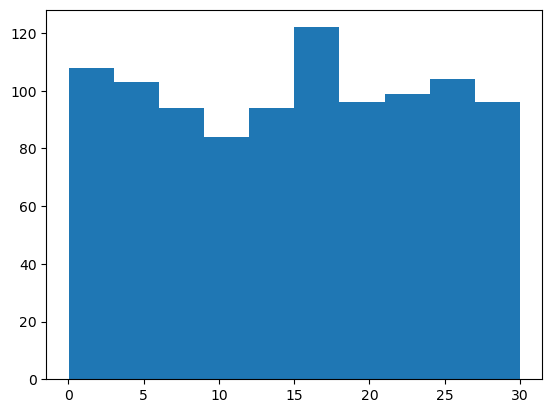

In [40]:
#histogram of simulated times
plt.hist(wait_times)
plt.show()

Here's a formatted version of your text, structured for clarity and readability:

## Binomial Distribution

### Introduction to Binomial Distribution

Expanding the probability toolbox with the binomial distribution involves understanding binary outcomes, such as coin flipping, where each flip has two possible results: heads or tails, each with a 50% chance. These outcomes can also be represented as 1/0, success/failure, or win/loss.

### Simulating Coin Flips in Python

To simulate coin flips, you can use `binom.rvs` from `scipy.stats`. The `size` argument controls the number of trials.

- **Example 1:** `binom.rvs(1, 0.5, size=1)` flips a fair coin once.
- **Example 2:** Flipping coins in different ways:
  - **One flip many times:** `binom.rvs(1, 0.5, size=8)` flips 1 coin 8 times.
  - **Many flips one time:** `binom.rvs(8, 0.5, size=1)` flips 8 coins once.
  - **Many flips many times:** `binom.rvs(3, 0.5, size=10)` flips 3 coins 10 times.

### Changing Probabilities

Adjusting the probability of heads to 25% (`binom.rvs(1, 0.25, size=8)`) results in fewer heads on average.

### Understanding the Binomial Distribution

The binomial distribution describes the probability of a given number of successes in a series of independent trials. It is characterized by two parameters:
- **n:** Number of trials
- **p:** Probability of success

**Example:** For `n = 10` and `p = 0.5`, getting 5 heads is the most likely outcome.

### Calculating Probabilities

- **Exact Probability:** The exact probability of getting 7 heads in 10 flips can be calculated using `binom.pmf(7, 10, 0.5)`, which is approximately 12%.
- **Cumulative Probability:** The cumulative probability of getting 7 or fewer heads is `binom.cdf(7, 10, 0.5)`, approximately 95%.
- **More than 7 Heads:** The probability of getting more than 7 heads is `1 - binom.cdf(7, 10, 0.5)`.

### Expected Value

The expected value (average number of successes) is given by the formula `E(X) = n * p`.

**Example:** For 10 flips with `p = 0.5`, the expected number of heads is `10 * 0.5 = 5`.

### Independence Condition

For the binomial distribution to apply, trials must be independent. Sampling without replacement changes probabilities, making the binomial model inaccurate.


In [7]:
# Import binom from scipy.stats
from scipy.stats import binom
import numpy as np

# Set random seed to 10
np.random.seed(10)

In [8]:
# Simulate a single deal
print(binom.rvs(1, 0.30, size=1))

[1]


In [9]:
# Simulate 1 week of 3 deals
print(binom.rvs(3, 0.30, size=1))

[0]


In [10]:
# Simulate 52 weeks of 3 deals
deals = binom.rvs(3, 0.30, size=52)

In [11]:
# Print mean deals won per week
print(np.mean(deals))

0.8461538461538461


In [12]:
#Calculating binomial probabilities

In [13]:
# Probability of closing 3 out of 3 deals
prob_3 = binom.pmf(3, 3, 0.30)

print(prob_3)

0.026999999999999996


In [14]:
# Probability of closing <= 1 deal out of 3 deals
prob_less_than_or_equal_1 = binom.cdf(1, 3, 0.3)

print(prob_less_than_or_equal_1)

0.784


In [15]:
# Probability of closing > 1 deal out of 3 deals
prob_greater_than_1 = 1 - binom.cdf(1, 3, 0.3)

print(prob_greater_than_1)

0.21599999999999997


In [16]:
# Expected number won with 30% win rate
won_30pct = 3 * 0.30
print(won_30pct)

# Expected number won with 25% win rate
won_25pct = 3 * 0.25
print(won_25pct)

# Expected number won with 35% win rate
won_35pct = 3 * 0.35
print(won_35pct)

0.8999999999999999
0.75
1.0499999999999998


# Normal Distribution
The normal distribution, also called the "bell curve," is a fundamental probability distribution used in statistics.

## Key Properties:
- **Symmetry** – The left and right sides are mirror images.
- **Total Area = 1** – Like all continuous distributions, the total probability under the curve is 1.
- **Curve Never Reaches Zero** – Even at extreme ends, probability remains positive.
- **Defined by Mean & Standard Deviation** – It is characterized by its mean (center) and standard deviation (spread).
- **Standard Normal Distribution** – A special case where mean = 0 and standard deviation = 1.

## Areas Under the Curve:
- 68% of data lies within 1 standard deviation of the mean.
- 95% within 2 standard deviations.
- 99.7% within 3 standard deviations (**68-95-99.7 rule**).

## Applications & Approximation:
- Many real-world datasets (e.g., heights) follow the normal distribution.
- The **cumulative distribution function (CDF)** helps find the percentage of values below a threshold.
- The **percent-point function (PPF)** finds the threshold below which a given percentage of values lie.

## Practical Calculations:
- Using `scipy.stats.norm.cdf`, one can calculate the proportion of women shorter than 154 cm (~16%).
- Subtracting CDF values helps find probabilities for specific height ranges.
- `scipy.stats.norm.ppf` finds height values corresponding to a given percentile (e.g., 90% of women are shorter than 170 cm).
- `scipy.stats.norm.rvs` generates random numbers following a normal distribution.

## Conclusion:
The normal distribution is widely applicable, and tools like CDF and PPF help analyze probabilities effectively.


In [24]:
# Histogram of amount with 10 bins and show plot
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

amir_deals = pd.read_csv(r"C:\Users\Nikhil Patil\Downloads\amir_deals.csv")

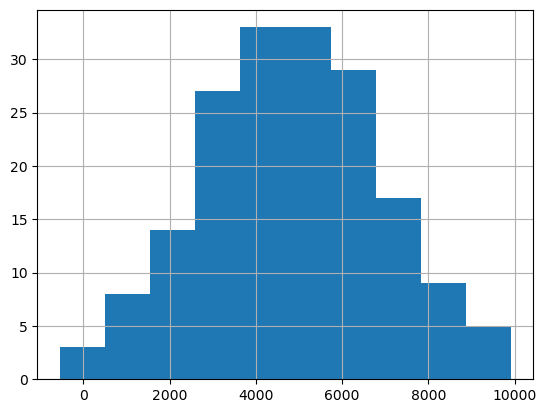

In [25]:
amir_deals['amount'].hist(bins=10)
plt.show()

#Probabilities from the normal distribution
Since each deal Amir worked on (both won and lost) was different, each was worth a different amount of money. These values are stored in the amount column of amir_deals and follow a normal distribution with a mean of 5000 dollars and a standard deviation of 2000 dollars. As part of his performance metrics, you want to calculate the probability of Amir closing a deal worth various amounts.

In [29]:
#import norm

from scipy.stats import norm 

In [30]:
# Probability of deal < 7500
prob_less_7500 = norm.cdf(7500, 5000, 2000)

print(prob_less_7500)

0.8943502263331446


In [31]:
# Probability of deal > 1000
prob_over_1000 = 1- norm.cdf(1000, 5000, 2000)

print(prob_over_1000)

0.9772498680518208


In [32]:
# Probability of deal between 3000 and 7000
prob_3000_to_7000 = norm.cdf(7000, 5000, 2000) - norm.cdf(3000, 5000, 2000)

print(prob_3000_to_7000)

0.6826894921370859


In [33]:
# Calculate amount that 25% of deals will be less than
pct_25 = norm.ppf(0.25, 5000, 2000)

print(pct_25)

3651.0204996078364


Simulating sales under new market conditions
The company's financial analyst is predicting that next quarter, the worth of each sale will increase by 20% and the volatility, or standard deviation, of each sale's worth will increase by 30%. To see what Amir's sales might look like next quarter under these new market conditions, you'll simulate new sales amounts using the normal distribution and store these in the new_sales DataFrame, which has already been created for you.

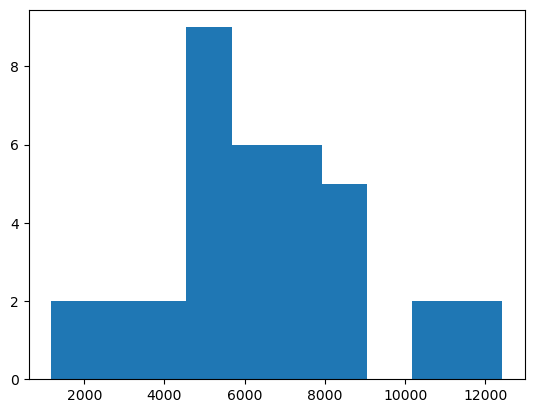

In [34]:
# Calculate new average amount
new_mean = 5000 * 1.2

# Calculate new standard deviation
new_sd = 2000 * 1.3

# Simulate 36 new sales
new_sales = norm.rvs(new_mean, new_sd, size=36)

# Create histogram and show
plt.hist(new_sales)
plt.show()

# Central Limit Theorem (CLT)

## Introduction
- Explains the importance of the normal distribution.

## Rolling Dice and Taking Means
- Rolling a die 5 times and calculating the mean.
- Repeating this process results in different means each time.

## Sampling Distributions
- Repeating the process 10 times and plotting the sample means.
- A distribution of a summary statistic (like the mean) is called a **sampling distribution**.

## Increasing Sample Size
- Rolling dice 100 times creates a sampling distribution resembling a normal distribution.
- With 1000 trials, it closely approximates the normal distribution.

## Definition of CLT
- The **CLT states** that as the number of trials increases, the sampling distribution approaches a normal distribution.
- CLT applies when samples are taken randomly and independently.

## Standard Deviation and CLT
- CLT applies to other summary statistics like **standard deviation**, which also follows a normal distribution.

## Proportions and CLT
- CLT applies to proportions, such as the probability of selecting a specific individual in repeated samples.

## Estimating Parameters Using CLT
- The **mean of a sampling distribution** provides an estimate of the population mean, standard deviation, or proportion.
- Useful when dealing with large populations where full data collection is impractical.


The CLT in action
The central limit theorem states that a sampling distribution of a sample statistic approaches the normal distribution as you take more samples, no matter the original distribution being sampled from.

In this exercise, you'll focus on the sample mean and see the central limit theorem in action while examining the num_users column of amir_deals more closely, which contains the number of people who intend to use the product Amir is selling.

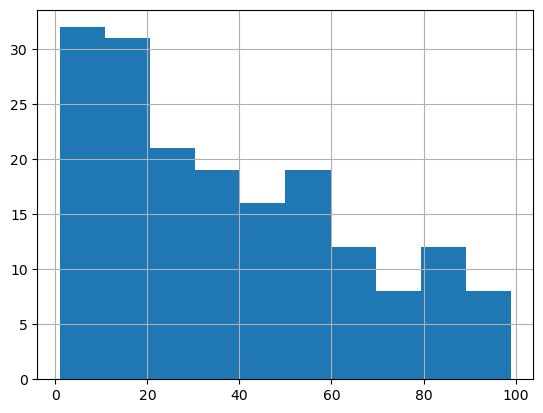

In [41]:
# Create a histogram of num_users and show
amir_deals['num_users'].hist()
plt.show()

In [42]:
# Set seed to 104
np.random.seed(104)

# Sample 20 num_users with replacement from amir_deals
samp_20 = amir_deals['num_users'].sample(20, replace=True)

# Take mean of samp_20
print(np.mean(samp_20))

32.0


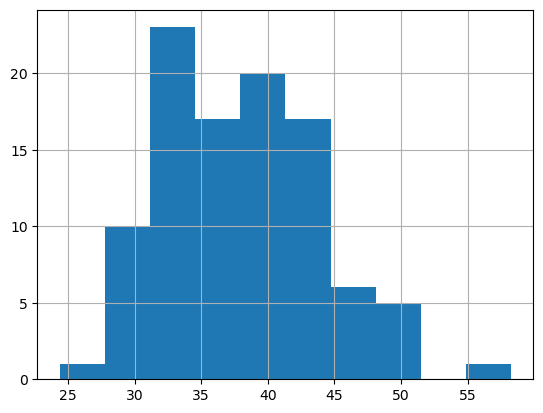

In [43]:
# Set seed to 104
np.random.seed(104)

sample_means = []
# Loop 100 times
for i in range(100):
  # Take sample of 20 num_users
  samp_20 = amir_deals['num_users'].sample(20, replace=True)
  # Calculate mean of samp_20
  samp_20_mean = np.mean(samp_20)
  # Append samp_20_mean to sample_means
  sample_means.append(samp_20_mean)
  
# Convert to Series and plot histogram
sample_means_series = pd.Series(sample_means)
sample_means_series.hist()
# Show plot
plt.show()

In [44]:
# Set seed to 321
np.random.seed(321)

sample_means = []
# Loop 30 times to take 30 means
for i in range(30):
  # Take sample of size 20 from num_users col of all_deals with replacement
  cur_sample = all_deals['num_users'].sample(20, replace=True)
  # Take mean of cur_sample
  cur_mean = np.mean(cur_sample)
  # Append cur_mean to sample_means
  sample_means.append(cur_mean)

# Print mean of sample_means
print(np.mean(sample_means))

# Print mean of num_users in amir_deals
print(np.mean(amir_deals['num_users']))

NameError: name 'all_deals' is not defined

# Introduction to Poisson Distribution

The Poisson distribution models the probability of events occurring over a fixed period.

## Poisson Processes
- Events occur at a constant rate but randomly (e.g., animal adoptions, restaurant arrivals, earthquakes).

## Definition of Poisson Distribution
- Describes the probability of a certain number of events happening in a time period.

## Lambda (λ) - The Key Parameter
- Represents the average number of events per time unit.
- Also the expected value of the distribution.

## Effect of Lambda on Shape
- Higher λ shifts the distribution while keeping its peak at λ.

## Calculating Probabilities
- **Single value probability**: Use `poisson.pmf(value, λ)`.
- **Cumulative probability**: Use `poisson.cdf(value, λ)`.
- **Greater than a value**: Subtract cumulative probability from 1.

## Sampling from a Poisson Distribution
- Use `poisson.rvs(λ, size=n)` to simulate events over multiple time periods.

## Central Limit Theorem (CLT) and Poisson
- The sampling distribution of sample means approximates a normal distribution for large samples.


In [46]:
# Import poisson from scipy.stats
from scipy.stats import poisson

# Probability of 5 responses
prob_5 = poisson.pmf(5, 4)

print(prob_5)

0.1562934518505317


In [47]:
# Probability of 5 responses
prob_coworker = poisson.pmf(5, 5.5)

print(prob_coworker)

0.17140068409793663


In [48]:
# Probability of 2 or fewer responses
prob_2_or_less = poisson.cdf(2, 4)

print(prob_2_or_less)

0.23810330555354436


In [49]:
# Probability of > 10 responses
prob_over_10 = 1 - poisson.cdf(10, 4)

print(prob_over_10)

0.0028397661205137315


# Introduction to Probability Distributions

- Discusses different probability distributions, starting with the **exponential distribution**.

## Exponential Distribution
- Models the time between Poisson events, like the time between adoptions, restaurant arrivals, or earthquakes.
- It is **continuous** and uses the same rate parameter (lambda) as the Poisson distribution.
- The exponential distribution declines steeply based on the rate, and the expected time between events is **1 divided by lambda**.

## Customer Service Requests
- **Example**: If a customer service ticket is created every 2 minutes, the lambda value is 0.5, meaning half a ticket is created per minute.
- The expected time between requests is **2 minutes**.

## Calculating Probabilities
- Use `expon.cdf` to calculate probabilities for waiting times between events.
- For example, the chance of waiting less than 1 minute is **40%**, and between 1 and 4 minutes is **50%**.

## Student's t-Distribution
- Similar to the normal distribution but with **thicker tails**.
- It has a parameter called **degrees of freedom (df)**, where lower df results in thicker tails and a higher standard deviation.

## Log-Normal Distribution
- Variables with a **log-normal distribution** have a logarithm that is normally distributed, leading to skewed distributions.
- Examples include the length of chess games, blood pressure, and hospitalizations during the SARS outbreak.


In [50]:
# Import expon from scipy.stats
from scipy.stats import expon

# Print probability response takes < 1 hour
print(expon.cdf(1, scale=2.5))

0.3296799539643607


In [51]:
# Print probability response takes > 4 hours
print(1-expon.cdf(4, scale=2.5))

0.20189651799465536


In [52]:
# Print probability response takes 3-4 hours
print(expon.cdf(4, scale=2.5) - expon.cdf(3, scale=2.5))

0.09929769391754684


# 1. Introduction to Correlation
- Focuses on correlation and experimental design.
- The key concept of this chapter is to understand how variables are related to each other and how to measure those relationships.

# 2. Relationships Between Two Variables
- When exploring relationships between two numeric variables, we can use a **scatter plot** to visualize them.
  - The x-axis represents the **explanatory** or **independent** variable.
  - The y-axis represents the **response** or **dependent** variable.
- **Example**: You could plot the relationship between the total amount of sleep mammals get and the amount of REM sleep they get.

# 3. Correlation Coefficient
- A numerical value called the **correlation coefficient** is used to quantify the relationship between two numeric variables. It ranges from **-1 to 1**:
  - A correlation coefficient close to **1** indicates a strong **positive** relationship.
  - A correlation coefficient close to **-1** indicates a strong **negative** relationship.
  - A correlation coefficient of **0** means no relationship.
- This coefficient gives us the **strength** (magnitude) and **direction** (positive or negative) of the relationship.

# 4. Magnitude = Strength of Relationship
- The magnitude of the correlation coefficient corresponds to the strength of the relationship:
  - **0.99**: A very strong relationship with points tightly clustered around the trendline (near-perfect correlation).
  - **0.75**: A moderately strong relationship, where data points are somewhat scattered around the trendline.
  - **0.56**: A moderate correlation, where data points are spread more widely but still exhibit a general trend.
  - **0.2**: A weak relationship, with data points scattered across the plot.
  - **0**: No relationship, the data points are scattered randomly with no discernible pattern.

# 5. Sign = Direction
- The **sign** (positive or negative) of the correlation coefficient indicates the direction of the relationship:
  - A **positive correlation** means that as the explanatory variable (x) increases, the response variable (y) also increases.
  - A **negative correlation** means that as the explanatory variable (x) increases, the response variable (y) decreases.

# 6. Visualizing Relationships
- A scatterplot can be created using **Seaborn**, a plotting library built on top of **matplotlib**.
  - The `sns.scatterplot()` function helps plot the relationship between two variables.
  - To add a trendline, you can use `sns.lmplot()` to add a **linear regression line**, making it easier to see the relationship.

# 7. Adding a Trendline
- To enhance the visual representation of the relationship between variables, you can add a linear trendline to the scatter plot using Seaborn’s **lmplot()** function.
- The `ci` parameter can be set to **None** to remove confidence intervals, focusing solely on the line.
- Trendlines help to clarify the strength and direction of the relationship between the variables.

# 8. Computing Correlation
- The correlation coefficient can be calculated using the `.corr()` method in **pandas**.
  - For instance, if you want to find the correlation between the `sleep_total` and `sleep_rem` columns in the `msleep` DataFrame, you can call `.corr()` on one of the series (columns) and pass the other as an argument.
  - The order of the arguments doesn't matter because correlation is **symmetric** (i.e., the correlation between x and y is the same as y and x).

# 9. Methods of Calculating Correlation
- The most commonly used method to calculate correlation is the **Pearson correlation coefficient (r)**.
  - The formula for Pearson correlation involves the means and standard deviations of the two variables.
- There are other methods to calculate correlation, such as **Kendall's tau** and **Spearman's rho**, but they are beyond the scope of this course.
- The **Pearson coefficient** is preferred when the data follows a **linear relationship**.


In [55]:
#import data
import pandas as pd
import seaborn as sns
world_happiness = pd.read_csv(r"C:\Users\Nikhil Patil\Downloads\world_happiness.csv")

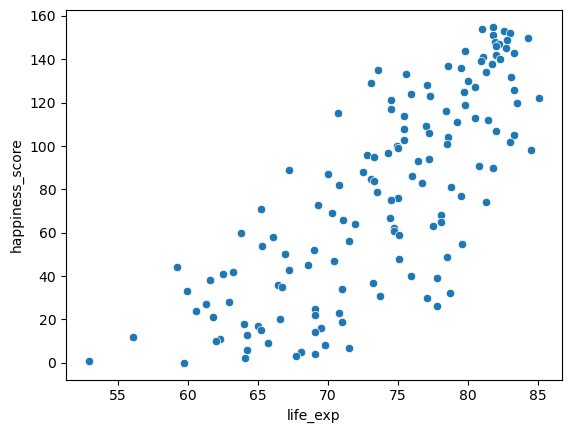

In [58]:
# Create a scatterplot of happiness_score vs. life_exp and show
sns.scatterplot(x='life_exp', y='happiness_score', data=world_happiness)

# Show plot
plt.show()

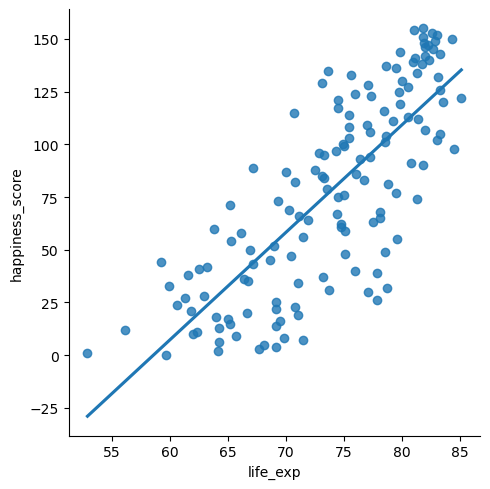

In [59]:
# Create scatterplot of happiness_score vs life_exp with trendline
sns.lmplot(x='life_exp', y='happiness_score', data=world_happiness, ci=None)


# Show plot
plt.show()

In [63]:
#Find Corr
cor = world_happiness['happiness_score'].corr(world_happiness['life_exp'])
print(cor)

0.7802249053272062


# 1. Introduction to Correlation Caveats

While correlation is a useful tool for measuring relationships between variables, there are important limitations to keep in mind.
This chapter discusses cases where correlation may not be reliable and explores methods to improve analysis.

# 2. Non-Linear Relationships

Example: A dataset shows a clear relationship between x and y, but the calculated correlation is only 0.18.
This happens because the relationship is quadratic (non-linear), whereas correlation measures only linear relationships.

Key takeaway: Correlation only quantifies linear relationships, so it shouldn't be used blindly. Always visualize your data before drawing conclusions.

# 3. Mammal Sleep Data Example

A scatterplot of mammal body weight vs. awake time shows that the relationship is not linear.
The computed correlation coefficient is only 0.3, indicating a weak linear relationship.
However, this low correlation does not mean there’s no relationship—it could be non-linear.

# 4. Skewed Data and Log Transformation

The distribution of body weight is highly skewed, meaning there are many small values and a few extremely large ones.
To address this, we apply a log transformation, creating a new variable `log_bodywt = log(bodywt)` using `np.log()`.
When plotting `log(bodywt)` vs. awake time, the relationship appears more linear than before.
The correlation also improves from 0.3 to 0.57, demonstrating that transformations can enhance linearity.

# 5. Other Transformations

Besides log transformation, other methods help make relationships more linear:
* Square root transformation (reduces skewness).
* Reciprocal transformation (useful for long-tailed distributions).

The best transformation depends on the data. Sometimes, transformations can be applied to both x and y simultaneously.

# 6. Why Use Transformations?

Many statistical methods, including correlation and linear regression, assume that variables are linearly related.
Transformations help meet this assumption, improving the reliability of analysis.

# 7. Correlation Does Not Imply Causation

Just because two variables are correlated doesn’t mean one causes the other.
Example: A scatterplot shows a 0.99 correlation between US margarine consumption and the divorce rate in Maine.
This correlation is spurious—eating margarine clearly does not cause divorce.
Spurious correlations occur when unrelated variables happen to change in similar ways.

# 8. Confounding Variables

A confounder (lurking variable) is a hidden third factor that affects both variables, creating misleading correlations.
Example: Coffee and Lung Cancer
* Data shows coffee drinking is correlated with lung cancer.
* However, a hidden variable—smoking— is influencing both.
* Smoking is associated with both higher coffee consumption and lung cancer risk.
* In reality, coffee does not cause lung cancer, but the correlation appears due to smoking.

Another example:
* Holidays and retail sales are correlated.
* However, special promotions and discounts also influence sales.
* It’s unclear whether sales increase because of the holidays or because of promotions—the latter is a confounder.

# 9. Responsible Use of Correlation

* Always visualize data before using correlation.
* Check for non-linearity—correlation only captures linear relationships.
* Be aware of confounders—correlation does not prove causation.
* Use transformations if data is skewed or non-linear.

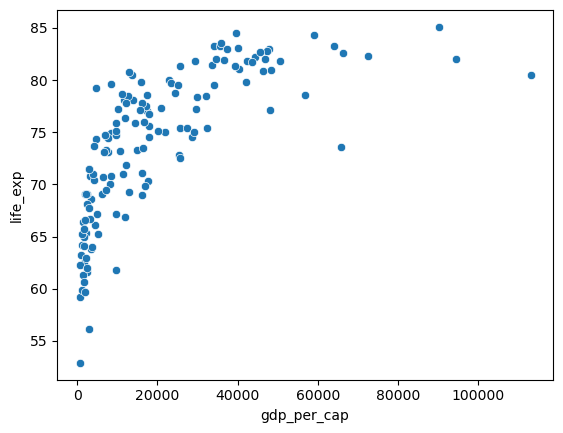

In [64]:
# Scatterplot of gdp_per_cap and life_exp
sns.scatterplot(x='gdp_per_cap', y='life_exp', data=world_happiness)

# Show plot
plt.show()

In [66]:
# Correlation 
cor = world_happiness['gdp_per_cap'].corr(world_happiness['life_exp'])

print(cor)

0.7019547642148012


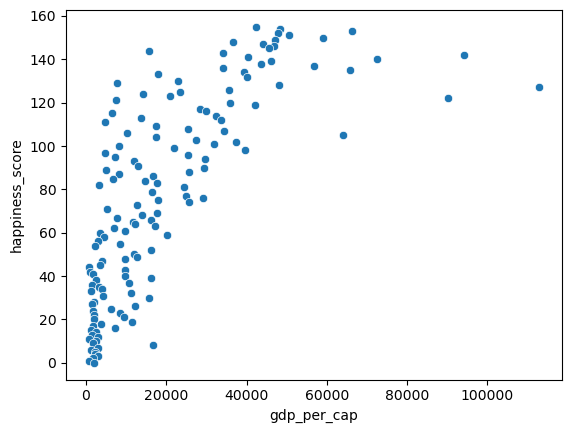

0.727973301222298


In [68]:
#Transforming variables


# Scatterplot of happiness_score vs. gdp_per_cap
sns.scatterplot(x='gdp_per_cap', y='happiness_score', data=world_happiness)
plt.show()

# Calculate correlation
cor = world_happiness['happiness_score'].corr(world_happiness['gdp_per_cap'])
print(cor)

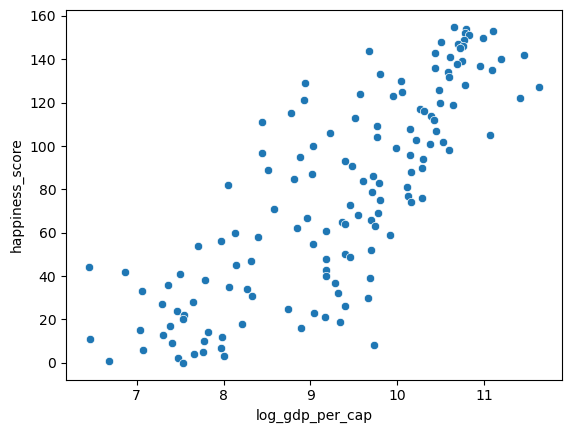

0.8043146004918288


In [71]:
# Create log_gdp_per_cap column
world_happiness['log_gdp_per_cap'] = np.log(world_happiness['gdp_per_cap'])

# Scatterplot of happiness_score vs. log_gdp_per_cap
sns.scatterplot(x='log_gdp_per_cap', y='happiness_score', data=world_happiness)
plt.show()

# Calculate correlation
cor = world_happiness['log_gdp_per_cap'].corr(world_happiness['happiness_score'])
print(cor)